In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

### The Legion of Evil is the world's #2 most evil organization in the world, but we could be number one!
#### Through tough negotiations and uncomfortable silences, we have been granted a meeting with the #1 most evil organization, the Legion of Doom! This is our chance, recruit, to make it to the big time. Let's not fail now!

#### Let's start by loading in our database and printing the head

In [5]:
marvel = pd.read_csv('/Users/Shreyas/Labs/dsi-sea-week02-5.2/assets/datasets/marvel.csv')
print marvel.head()

   page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   

#### We have some extra data from our teams in the field about the comings and goings of our heroes in the list. Let's run this once and continue to the next field

In [6]:
def randomly(length):
    return np.random.randint(0, length, size = 1)[0]

def pull_unique(length, arr):
    this_rand = randomly(length)
    while this_rand in arr:
        this_rand = randomly(length)
    return this_rand

def make_week(number):
    return "Week: " + str(number)


columns = 35
weeks = [make_week(x + 1) for x in range(columns)]

activity = ["sleeping","jogging","general tcb(taking care of business)",
            "goat wrangling","birthday party","hopscotch tournament",
           "evil fighting","having conflicting emotions about secret identity",
           "ordering pizza","eating jellybeans","working both sides",
            "being john malkovich","Netflix and chill", "munching on granola",
            "standing silently on one leg", "using powers for good", 
            "extensive pullups","running into walls","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages",
           "masticating", "doing magic tricks", "understanding the world", "Space!!!"]

dicty = {}

for week in weeks:
    dicty[week] = [activity[randomly(len(activity))] for x in range(len(marvel))]

dicty['page_id'] = marvel['page_id']

#### Let's add our new data to a dataframe and print the head

In [50]:
weeks = pd.DataFrame(dicty)
weeks.head()
len(weeks)

16376

#### Let's merge new this DataFrame with our marvel DataFrame

In [16]:
merged = pd.merge(marvel,weeks, how ='inner', on ='page_id')
merged.head()
merged.columns.values

array(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year',
       'Week: 1', 'Week: 10', 'Week: 11', 'Week: 12', 'Week: 13',
       'Week: 14', 'Week: 15', 'Week: 16', 'Week: 17', 'Week: 18',
       'Week: 19', 'Week: 2', 'Week: 20', 'Week: 21', 'Week: 22',
       'Week: 23', 'Week: 24', 'Week: 25', 'Week: 26', 'Week: 27',
       'Week: 28', 'Week: 29', 'Week: 3', 'Week: 30', 'Week: 31',
       'Week: 32', 'Week: 33', 'Week: 34', 'Week: 35', 'Week: 4',
       'Week: 5', 'Week: 6', 'Week: 7', 'Week: 8', 'Week: 9'], dtype=object)

#### Let's take a look at our data to see how it came out. General Immortus tells you that "Ormond Wychwood" should be in our database, let's print out his data.

In [21]:
merged[merged['name'].str.contains("Ormond Wychwood")]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,...,Week: 32,Week: 33,Week: 34,Week: 35,Week: 4,Week: 5,Week: 6,Week: 7,Week: 8,Week: 9
1016,84720,Ormond Wychwood (Earth-616),\/Ormond_Wychwood_(Earth-616),Secret Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,...,Space!!!,ordering pizza,jogging,jogging,ordering pizza,evil fighting,general tcb(taking care of business),being really really evil,extensive pullups,general tcb(taking care of business)


#### Everything looks good! Next, let's melt our table to find the most popular activity for our heroes by week

In [49]:
# merged.ix[:,:'Year']
# merged.ix[:,'Week: 1':]

melted_table = pd.melt(merged, id_vars=merged.ix[:,:'Year'].columns.values,var_name='week',value_name='activity')
len(melted_table)

573160

#### We are concerned about the activities of our valiant evil heroes vs. the unambitious good heroes. Let's print out a pivot table showing the differences. An example table can be found below.

In [270]:
pivot_melted = pd.pivot_table(melted_table[['page_id','ALIGN','activity']],index = ['ALIGN'] , columns=['activity'], values='page_id', aggfunc=len)
pivot_melted

activity,Netflix and chill,Space!!!,being john malkovich,being really really evil,birthday party,creating portals to other dimensions,doing magic tricks,eating jellybeans,evil fighting,extensive pullups,...,masticating,munching on granola,ordering pizza,running into walls,sleeping,standing silently on one leg,stealing puppies from orphanages,understanding the world,using powers for good,working both sides
ALIGN,,,,,,,,,,,,,,,,,,,,,
Bad Characters,8962,9031,9075,9088,9196,8885,8974,9128,9222,9024,...,9002,8983,9106,9062,9015,9123,9057,9161,9124,9168
Good Characters,6151,6299,6252,6290,6289,6281,6270,6121,6188,6279,...,6159,6300,6206,6324,6263,6197,6281,6131,6248,6321
Neutral Characters,2911,3029,3064,2998,2940,2958,2937,3001,2926,2965,...,3055,3027,2850,2994,2957,2943,3020,2953,2910,2987


#### Are our freedom fighters better at being evil on average? Let's make a boxplot of the number of times each character had an evil action against how they are aligned (evil, neutral, good). You can see a sample of the plot we are looking for below this cell.

In [74]:
evil_activities = ["working both sides","creating portals to other dimensions",
           "being really really evil", "insulting children", "stealing puppies from orphanages"]

In [224]:
# Create tabel only with evil activities
new = melted_table[['page_id','activity','week','ALIGN']]
new_alt = new[new['activity'].isin(evil_activities)]

In [255]:
# count of evil activities per page_id using pivot table
a = pd.pivot_table(new_alt[['page_id','ALIGN']],index=["page_id",], columns =['ALIGN'], aggfunc =len)

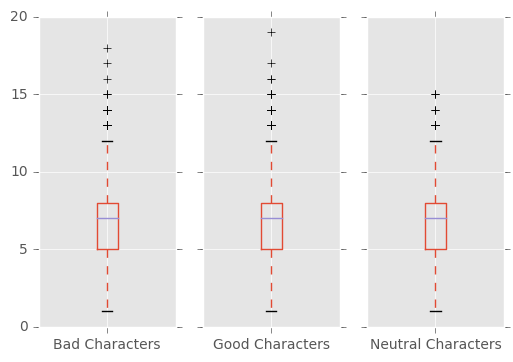

In [256]:
# plotting
a.plot(kind= 'box', subplots = True, sharey = True)
plt.show()

#### Now let's make a bar graph with pandas with the averages of the sum totals (evil / all activites) for our alignments. Which alignment on average was the most evil? Don't forget to give your chart a title and label your axis' recruits!

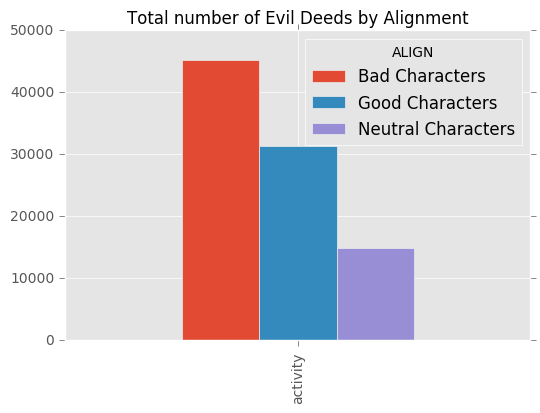

In [265]:
# total number of evil Deeds
b = pd.pivot_table(new_alt[['activity','ALIGN']],columns=["ALIGN"], aggfunc=len)
b.plot(kind= 'bar')
plt.title('Total number of Evil Deeds by Alignment', fontsize = 12)
plt.show()



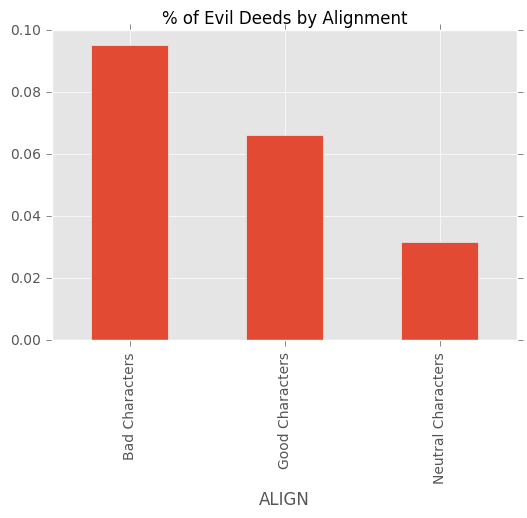

In [263]:
# Average of sum of all the Evil Deeds
c = a.fillna(0) 
np.mean(c/35).plot(kind= 'bar')
plt.title('% of Evil Deeds by Alignment', fontsize = 12)
plt.show()

#### Lex Luther ([Enterprising Leader of the Legion Of Doom](https://en.wikipedia.org/wiki/Legion_of_Doom_(DC_Comics)) has contracted you on one last personal project: To engineer a unique, cutting-edge slideshow for the lobby of the Legion of Doom! Here are the steps needed to complete the task.

* Replace each of your heroes activities with numbers denoting their alignment
    * 1 = good
    * -1 = evil
    * 0 = neutral (all activities not in good_activity or evil_activity lists)
* Pick a random hero from your dataset
* Plot his evilness/goodness over time with a line graph
* Make sure to print his name at the top of the graph and label your x and y axis!

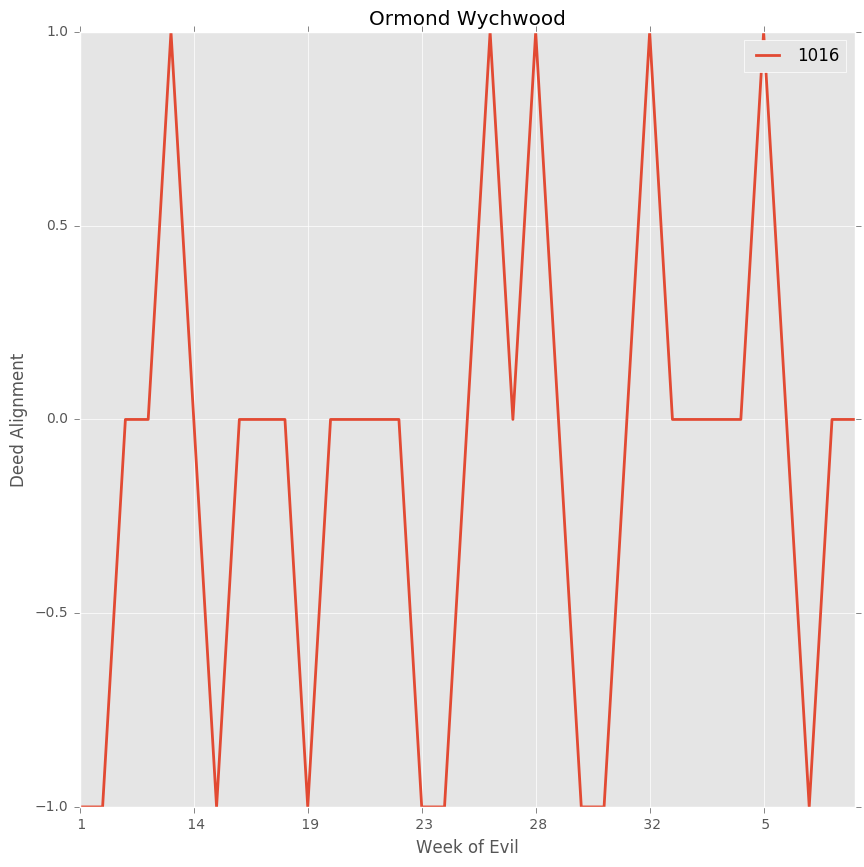

In [310]:
good_activity = ["birthday party","evil fighting",
                 "having conflicting emotions about secret identity",
           "using powers for good", "understanding the world", "Space!!!"]


a= merged.ix[merged['name'].str.contains('Ormond Wychwood '),'Week: 1':]
a.columns = a.columns.str.replace('Week:','')
 
a.replace(good_activity, 1, inplace=True)
a.replace(evil_activities, -1, inplace=True)
neutral =[]
for i in a.ix[1016]:
    if i != 1 and i != -1:
        neutral.append(i)
        
a.replace(neutral,0,inplace=True)
a = np.transpose(a)
ax = a.plot(lw=2,title='Ormond Wychwood', figsize=(10, 10))
ax.set_xlabel('Week of Evil')
ax.set_ylabel('Deed Alignment')

plt.show()


![Bar](./../../assets/plot_3.png "Bar")